In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thape\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
import re
import string

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

In [40]:
pip install wordcloud

In [41]:

from wordcloud import WordCloud

In [3]:
Mental_Health_Twitter_data=pd.read_csv('Mental-Health-Twitter.csv')
Mental_Health_Twitter_data.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("Unnamed: 0",axis=1)

In [5]:
Mental_Health_Twitter_data.shape

(20000, 10)

In [6]:
Mental_Health_Twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
Mental_Health_Twitter_data.isnull()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False


In [8]:
Mental_Health_Twitter_data.isnull().sum()

post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [9]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_id",axis=1)
#Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_created",axis=1)
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("user_id",axis=1)

In [10]:
Mental_Health_Twitter_data.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [11]:
Mental_Health_Twitter_data

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...
19995,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,442,230,7,1063601,0,0
19996,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",442,230,7,1063601,0,0
19997,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0
19998,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",442,230,7,1063601,0,0


In [12]:
Mental_Health_Twitter_data.corr()

,followers,friends,favourites,statuses,retweets,label
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


In [47]:
Mental_Health_Twitter_data['post_created'] = pd.to_datetime(Mental_Health_Twitter_data['post_created'])
Mental_Health_Twitter_data["Month"] = Mental_Health_Twitter_data.post_created.dt.month
Mental_Health_Twitter_data["Year"] = Mental_Health_Twitter_data.post_created.dt.Year
Mental_Health_Twitter_data["day"] = Mental_Health_Twitter_data.post_created.dt.day


AttributeError: 'DatetimeProperties' object has no attribute 'Year'

In [48]:
Mental_Health_Twitter_data.posr_created=Mental_Health_Twitter_data.post_created.apply(pd.to_datetime)
Mental_Health_Twitter_data["Month"] = Mental_Health_Twitter_data.post_created.dt.month
Mental_Health_Twitter_data["Year"]= Mental_Health_Twitter_data.post_created.dt.year
Mental_Health_Twitter_data["day"]= Mental_Health_Twitter_data.post_created.dt.day

In [50]:
Mental_Health_Twitter_data=Mental_Health_Twitter_data.drop("post_created",axis=1)

In [51]:
Mental_Health_Twitter_data

,post_text,followers,friends,favourites,statuses,retweets,label,Total Words,Total Chars,Total Words After Transformation,Month,Year,day
0,its just over 2 years since i was diagnosed wi...,84,211,251,837,0,1,26,115,3.258097,8,2015,30
1,its sunday i need a break so im planning to sp...,84,211,251,837,1,1,19,77,2.944439,8,2015,30
2,awake but tired i need to sleep but my brain h...,84,211,251,837,0,1,13,52,2.564949,8,2015,29
3,rt sewhq retro bears make perfect gifts and ar...,84,211,251,837,2,1,23,118,3.091042,8,2015,29
4,it’s hard to say whether packing lists are mak...,84,211,251,837,1,1,21,113,3.044522,8,2015,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,a day without sunshine is like night,442,230,7,1063601,0,0,7,31,1.945910,1,2017,12
19996,borens laws 1 when in charge ponder 2 when in ...,442,230,7,1063601,0,0,17,83,2.833213,1,2017,12
19997,the flow chart is a most thoroughly oversold p...,442,230,7,1063601,0,0,20,105,2.995732,1,2017,12
19998,ships are safe in harbor but they were never m...,442,230,7,1063601,0,0,13,54,2.564949,1,2017,12


In [52]:
Mental_Health_Twitter_data['label'].value_counts()

1    10000
0    10000
Name: label, dtype: int64

 #### Bar and Pie plot by '0' and '1'

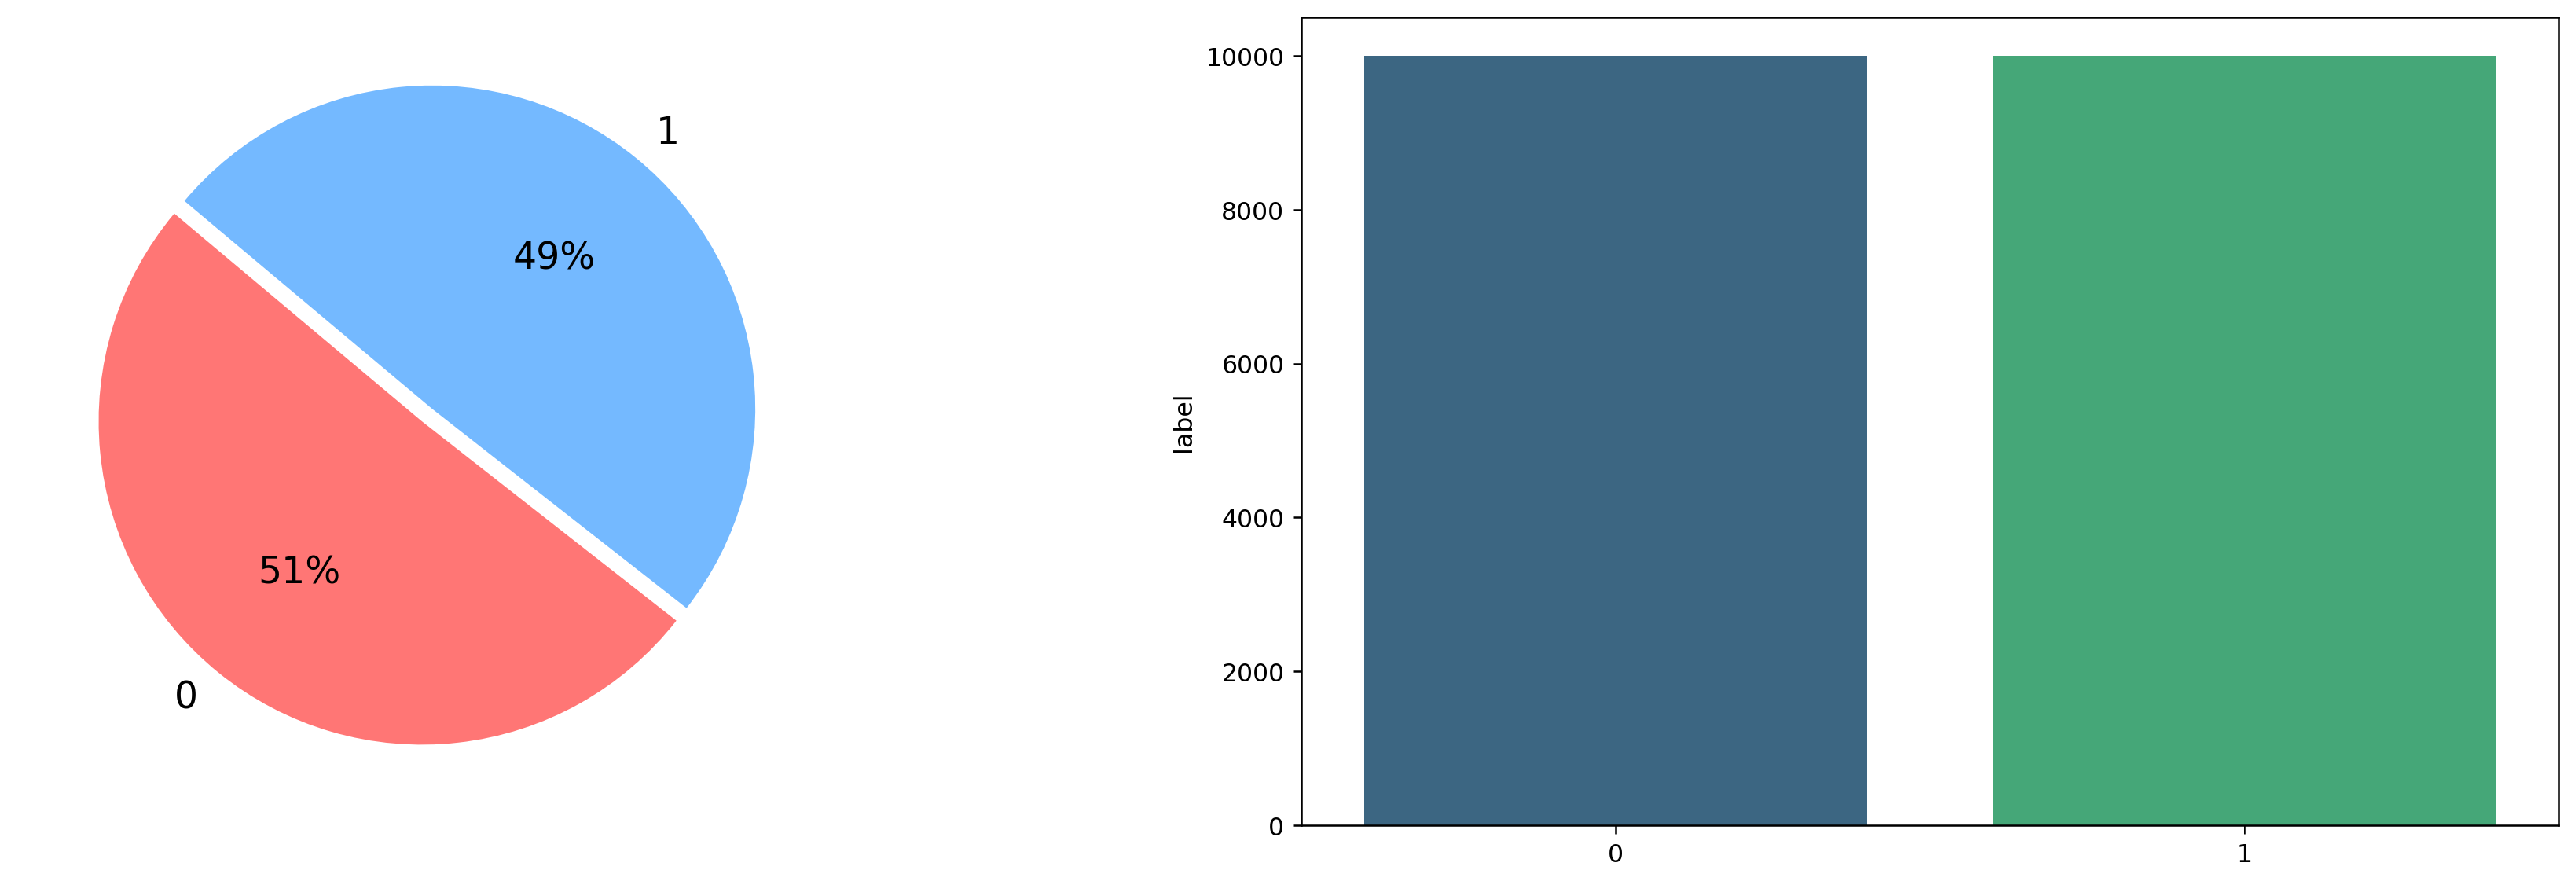

In [53]:


labels = [0, 1]
sizes = [14139, 13838]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = Mental_Health_Twitter_data['label'].unique(), y = Mental_Health_Twitter_data['label'].value_counts(), palette= 'viridis')

plt.show()

#### Creating new columns 'Total Words' and 'Total Chars'

In [54]:

Mental_Health_Twitter_data['Total Words'] = Mental_Health_Twitter_data['post_text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

Mental_Health_Twitter_data['Total Chars'] = Mental_Health_Twitter_data["post_text"].apply(count_total_words)

In [55]:
Mental_Health_Twitter_data.head()

,post_text,followers,friends,favourites,statuses,retweets,label,Total Words,Total Chars,Total Words After Transformation,Month,Year,day
0,its just over 2 years since i was diagnosed wi...,84,211,251,837,0,1,26,108,3.258097,8,2015,30
1,its sunday i need a break so im planning to sp...,84,211,251,837,1,1,19,69,2.944439,8,2015,30
2,awake but tired i need to sleep but my brain h...,84,211,251,837,0,1,13,48,2.564949,8,2015,29
3,rt sewhq retro bears make perfect gifts and ar...,84,211,251,837,2,1,22,98,3.091042,8,2015,29
4,it’s hard to say whether packing lists are mak...,84,211,251,837,1,1,21,108,3.044522,8,2015,29


 #### Kdeplot by Total Words

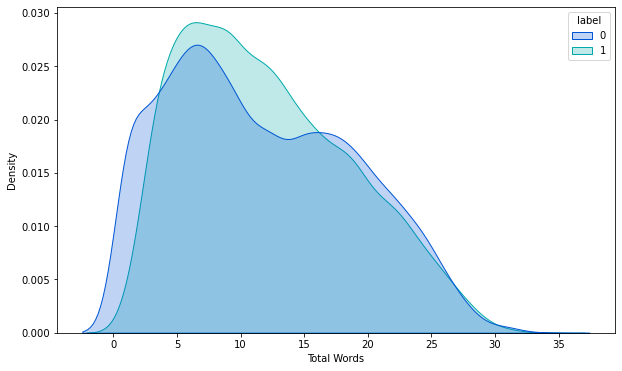

In [56]:


plt.figure(figsize = (10, 6))
sns.kdeplot(x = Mental_Health_Twitter_data['Total Words'], hue= Mental_Health_Twitter_data['label'], palette= 'winter', shade = True)
plt.show()

 ### Kdeplot by Total Chars

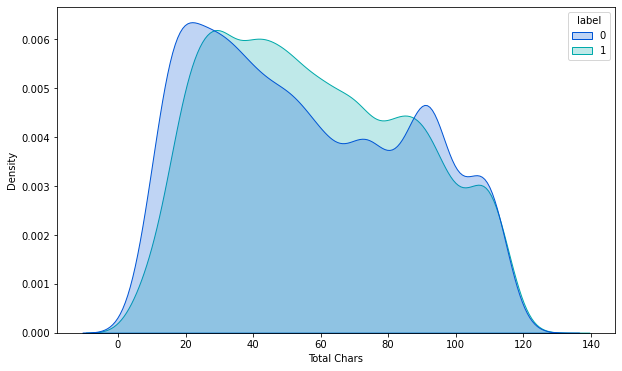

In [57]:
 

plt.figure(figsize = (10, 6))
sns.kdeplot(x = Mental_Health_Twitter_data['Total Chars'], hue= Mental_Health_Twitter_data['label'], palette= 'winter', shade = True)
plt.show()

 #### Text preprocessing

#### 1) Lowercasing

In [58]:


def convert_lowercase(text):
    text = text.lower()
    return text

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(convert_lowercase)

 #### 2) Removing URLs

In [59]:


import re
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_url)

 #### 3) Removing Punctuations

In [60]:

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_punc)

 #### 4) Removing stopwords

In [62]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thape\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(remove_stopwords)

 #### 5) Stemming

In [64]:


def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

Mental_Health_Twitter_data['post_text'] = Mental_Health_Twitter_data['post_text'].apply(perform_stemming)

 #### 6) Creating new column 'Total Words After Transformation'

In [65]:
Mental_Health_Twitter_data['Total Words After Transformation'] = Mental_Health_Twitter_data['post_text'].apply(lambda x: np.log(len(x.split())))

In [66]:
Mental_Health_Twitter_data.head()

,post_text,followers,friends,favourites,statuses,retweets,label,Total Words,Total Chars,Total Words After Transformation,Month,Year,day
0,2 year sinc diagnos anxieti depress today im t...,84,211,251,837,0,1,26,108,2.708050,8,2015,30
1,sunday need break im plan spend littl time pos...,84,211,251,837,1,1,19,69,2.302585,8,2015,30
2,awak tire need sleep brain idea,84,211,251,837,0,1,13,48,1.791759,8,2015,29
3,rt sewhq retro bear make perfect gift great be...,84,211,251,837,2,1,22,98,2.708050,8,2015,29
4,’ hard say whether pack list make life easier ...,84,211,251,837,1,1,21,108,2.708050,8,2015,29


In [67]:
 #### Data Visualization

In [68]:
#### 1) Word Cloud by label '0'

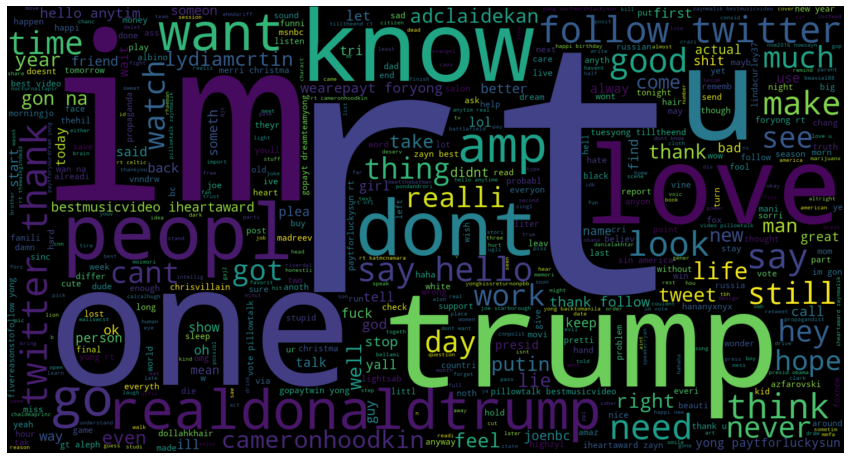

In [69]:


text = " ".join(Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 0]['post_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 #### 2) Word Cloud by label '1'

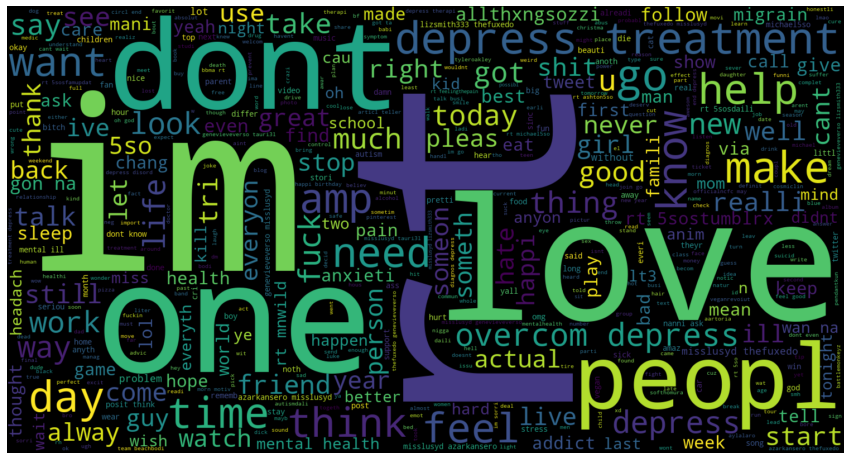

In [70]:


text = " ".join(Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 1]['post_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 #### 3) Word Frequency by label '0'

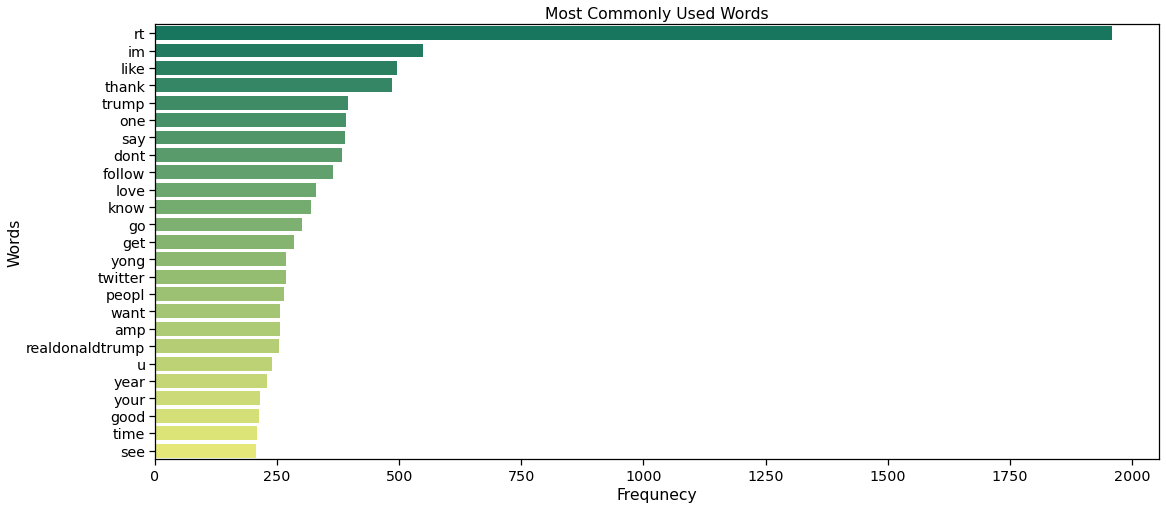

In [71]:


all_spam_words = []
for sentence in Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 0]['post_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

 #### 4) Word Frequency by label '1'

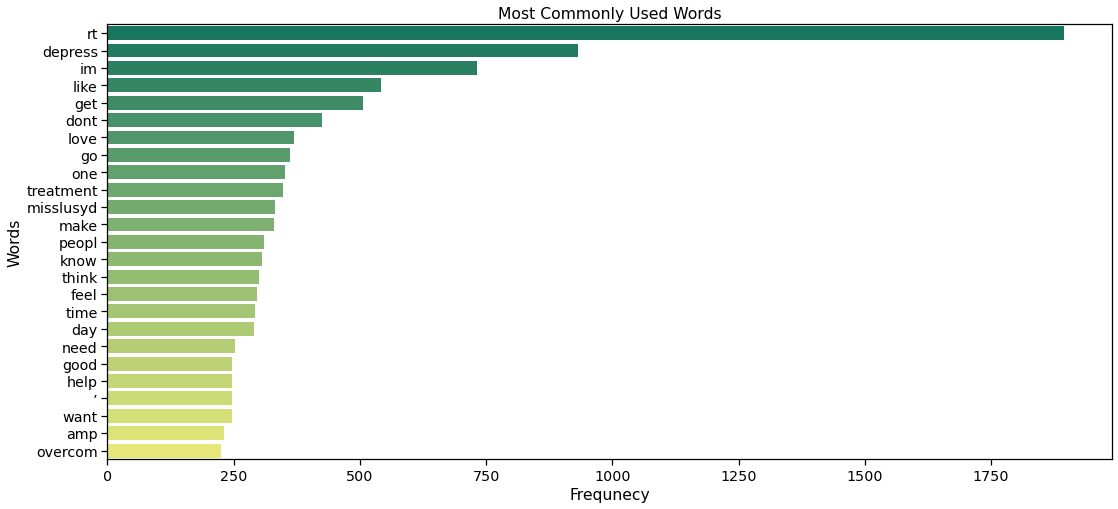

In [72]:


all_spam_words = []
for sentence in Mental_Health_Twitter_data[Mental_Health_Twitter_data['label'] == 1]['post_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

 #### Modeling

#### 1) Naive Bayes

In [73]:
X = Mental_Health_Twitter_data["post_text"]
y = Mental_Health_Twitter_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [74]:


tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [75]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix



In [84]:
def plot_confusion_matrix(y_true, y_pred, ax=None, cmap='Blues'):
    labels = list(set(y_true))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    return ax

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [92]:

def plot_roc(y_test, y_prob, ax, plot_macro=False, plot_micro=False, cmap='summer'):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    return ax

Accuracy of the model: 0.816
Precision Score of the model: 0.808
Recall Score of the model: 0.829


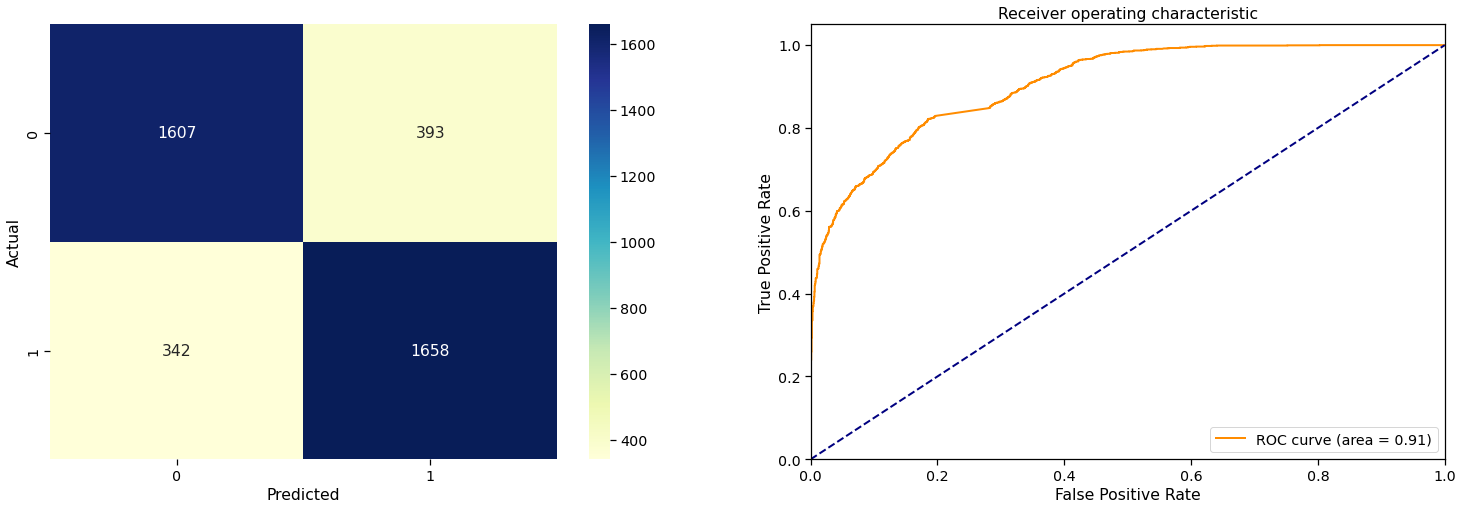

In [93]:

from sklearn.metrics import roc_curve, auc
nb = MultinomialNB()
train_model(nb)

In [111]:
from sklearn.preprocessing import LabelEncoder

# Assume that the 'column_name' column contains the string values
le = LabelEncoder()
Mental_Health_Twitter_data['post_text'] = le.fit_transform(Mental_Health_Twitter_data['post_text'])


  # Assume that the 'column_name' column contains the string values
#data = pd.get_dummies(data, columns=['column_name'])

 #### 2) Random Forest Classifier

In [112]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

ValueError: could not convert string to float: 'want free'

#### 3) LSTM

In [113]:
X = Mental_Health_Twitter_data["post_text"]
y = Mental_Health_Twitter_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
pip install tensorflow


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

ModuleNotFoundError: No module named 'tensorflow'

In [99]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', Mental_Health_Twitter_data['post_text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(Mental_Health_Twitter_data['post_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 2 year sinc diagnos anxieti depress today im take moment reflect far ive come sinc 



NameError: name 'Tokenizer' is not defined

In [ ]:
y = Mental_Health_Twitter_data.label
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
loss, accuracy,recall= model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print('Recall  : {:.4f}'.format(recall))

In [ ]:
#### 